### Choose two datasets with different distributions (dogs &cats , cars). 
1. Resize images to the required input size of the chosen pre-trained model. 
2. Load Pre-trained Model (LeNet-5 or  VGG-16 or MobileNetV2 or Resnet50 or AlexNet) 
. Compare the performances of all the models and visualize  
4. Write down your observations and conclusions  

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

2026-01-06 10:22:56.204440: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-06 10:22:56.211499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767675176.219594  113805 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767675176.222006  113805 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767675176.228296  113805 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
data = tf.keras.datasets.cifar10.load_data()

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [5]:
base_model_resnet = ResNet50V2(input_shape=(32,32,3), weights='imagenet',include_top=False )

I0000 00:00:1767675179.651980  113805 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9172 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
base_model_resnet

<Functional name=resnet50v2, built=True>

In [7]:
base_model_resnet.trainable = False

In [8]:
main_model_resnet = tf.keras.Sequential([
    base_model_resnet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [9]:
main_model_resnet.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
main_model_resnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 1, 1, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,835,978 (90.93 MB)

 Trainable params: 271,178 (1.03 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [11]:
main_model_resnet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
resnet_losses = main_model_resnet.history.history['loss']
res_acc = main_model_resnet.history.history['accuracy']

Epoch 1/10


I0000 00:00:1767675182.742734  113984 service.cc:152] XLA service 0x78cbd40027f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767675182.742746  113984 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2026-01-06 10:23:02.807298: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1767675183.372177  113984 cuda_dnn.cc:529] Loaded cuDNN version 91701
2026-01-06 10:23:03.926094: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4946', 204 bytes spill stores, 204 bytes spill loads

2026-01-06 10:23:04.085252: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_d

  64/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1074 - loss: 36.0356   

I0000 00:00:1767675186.483376  113984 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1543/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1041 - loss: 5.3288

2026-01-06 10:23:11.196165: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4946', 4 bytes spill stores, 4 bytes spill loads

2026-01-06 10:23:11.417148: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4946', 116 bytes spill stores, 116 bytes spill loads

2026-01-06 10:23:11.680364: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4946', 3940 bytes spill stores, 3920 bytes spill loads

2026-01-06 10:23:11.965342: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4946', 992 bytes spill stores, 992 bytes spill loads



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.1040 - loss: 5.2950 - val_accuracy: 0.1000 - val_loss: 2.3023
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0950 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0946 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1003 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0970 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0958 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accura

In [12]:
test_loss, test_acc = main_model_resnet.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1001 - loss: 2.3027
Test accuracy: 0.10000000149011612


In [13]:
preds = main_model_resnet.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


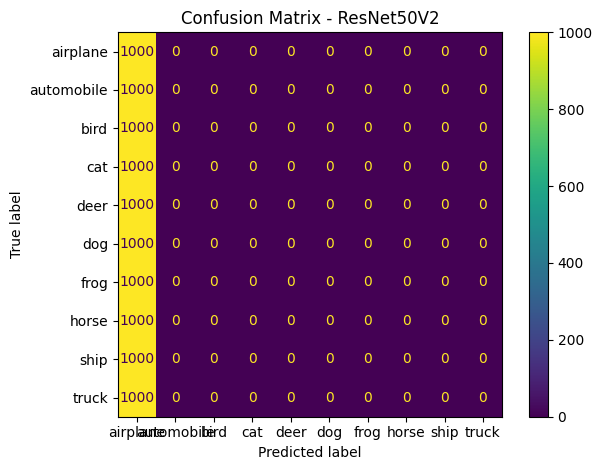

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
true_labels = y_test.flatten()

predicted_labels = np.argmax(preds, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix - ResNet50V2')
plt.tight_layout()
plt.show()

In [15]:
import gc
tf.keras.backend.clear_session() 
gc.collect() 

0

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base_model_mobilenet = MobileNetV2(input_shape=(32,32,3), weights='imagenet',include_top=False )
base_model_mobilenet
base_model_mobilenet.trainable = False
main_model_mobilenet = tf.keras.Sequential([
    base_model_mobilenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

main_model_mobilenet.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
main_model_mobilenet.summary()
main_model_mobilenet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

mobilenet_losses = main_model_mobilenet.history.history['loss']
mobilenet_acc = main_model_mobilenet.history.history['accuracy']
test_loss, test_acc = main_model_mobilenet.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

/tmp/ipykernel_113805/2946216259.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenet = MobileNetV2(input_shape=(32,32,3), weights='imagenet',include_top=False )


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,430,858 (9.27 MB)

 Trainable params: 172,874 (675.29 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


2026-01-06 10:24:08.581006: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 10:24:08.659660: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1552/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2035 - loss: 2.1513

2026-01-06 10:24:15.805457: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 10:24:15.883491: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 10:24:15.961956: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 10:24:16.040595: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-01-06 10:24:16.119446: E external/local_xla/xla/stream_

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2036 - loss: 2.1510 - val_accuracy: 0.2386 - val_loss: 2.0665
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2345 - loss: 2.0730 - val_accuracy: 0.2437 - val_loss: 2.0557
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2374 - loss: 2.0567 - val_accuracy: 0.2410 - val_loss: 2.0524
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2442 - loss: 2.0431 - val_accuracy: 0.2449 - val_loss: 2.0501
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2496 - loss: 2.0296 - val_accuracy: 0.2452 - val_loss: 2.0509
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2490 - loss: 2.0263 - val_accuracy: 0.2443 - val_loss: 2.0477
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2535 - loss: 2.0145 - val_accuracy: 0.2467 - val_loss: 2.0466
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2557 - loss: 2.0164 - val_accura

In [18]:
preds = main_model_mobilenet.predict(x_test, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


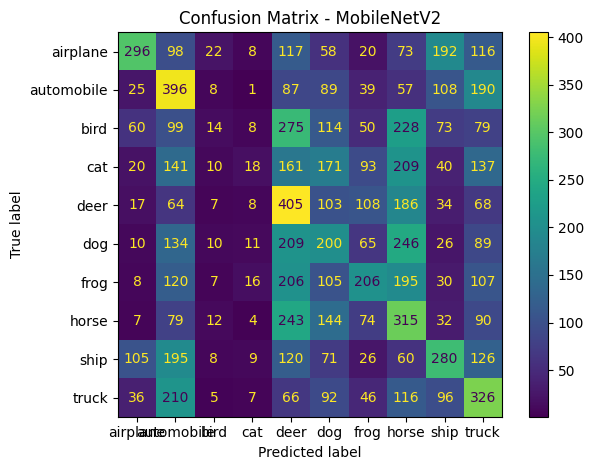

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
true_labels = y_test.flatten()

predicted_labels = np.argmax(preds, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix - MobileNetV2')
plt.tight_layout()
plt.show()

In [22]:
import gc
tf.keras.backend.clear_session() 
gc.collect() 

0

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
from tensorflow.keras.applications.vgg16 import VGG16

base_model_vgg16 = VGG16(input_shape=(32,32,3), weights='imagenet',include_top=False )
base_model_vgg16
base_model_vgg16.trainable = False
main_model_vgg16 = tf.keras.Sequential([
    base_model_vgg16,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

main_model_vgg16.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
main_model_vgg16.summary()
main_model_vgg16.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

vgg16_losses = main_model_vgg16.history.history['loss']
vgg16_acc = main_model_vgg16.history.history['accuracy']

test_loss, test_acc = main_model_vgg16.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,258 (56.42 MB)

 Trainable params: 74,570 (291.29 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3823 - loss: 2.6111 - val_accuracy: 0.5578 - val_loss: 1.2806
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5827 - loss: 1.2063 - val_accuracy: 0.5968 - val_loss: 1.1964
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6200 - loss: 1.0882 - val_accuracy: 0.5978 - val_loss: 1.1834
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6449 - loss: 1.0264 - val_accuracy: 0.6131 - val_loss: 1.1532
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6622 - loss: 0.9643 - val_accuracy: 0.6058 - val_loss: 1.1836
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6828 - loss: 0.9117 - val_accuracy: 0.6144 - val_loss: 1.1677
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6978 - loss: 0.8662 - val_accuracy: 0.6132 - val_loss: 1.1984
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7151 - loss: 0.8108 - 

In [25]:
y_preds = main_model_vgg16.predict(x_test, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


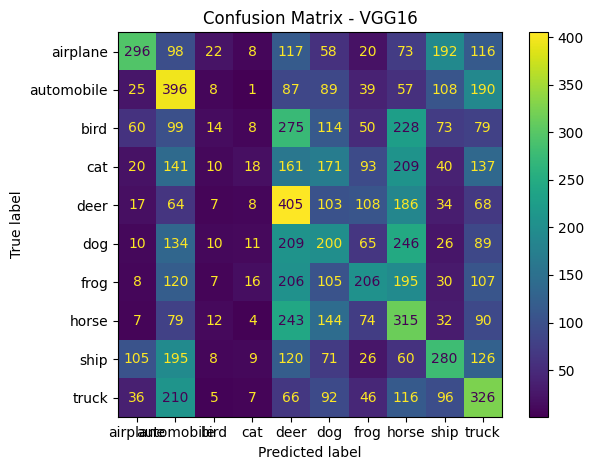

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
true_labels = y_test.flatten()

predicted_labels = np.argmax(preds, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix - VGG16')
plt.tight_layout()
plt.show()

In [27]:
import gc
tf.keras.backend.clear_session() 
gc.collect() 

0

Text(0.5, 1.0, 'Training Loss Comparison')

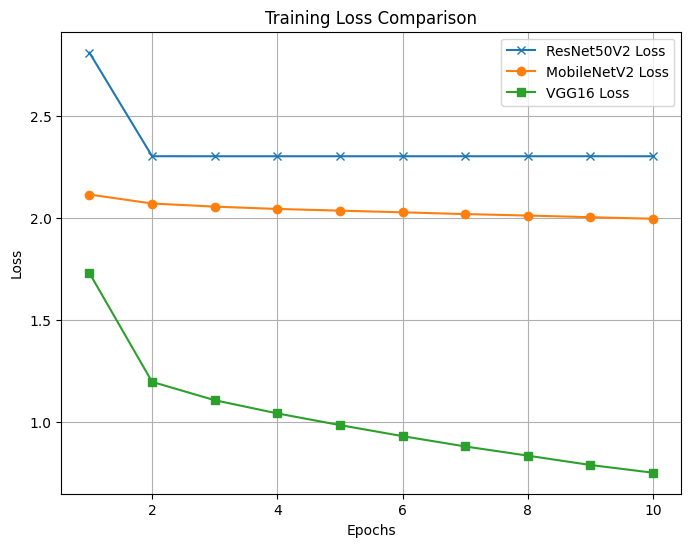

In [54]:
x = range(1, 11)
plt.figure(figsize=(8,6))
plt.plot(x,resnet_losses, label='ResNet50V2 Loss', marker='x')
plt.plot(x,mobilenet_losses, label='MobileNetV2 Loss', marker='o')
plt.plot(x,vgg16_losses, label='VGG16 Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid()
plt.title('Training Loss Comparison')

Text(0.5, 1.0, 'Training Accuracy Comparison')

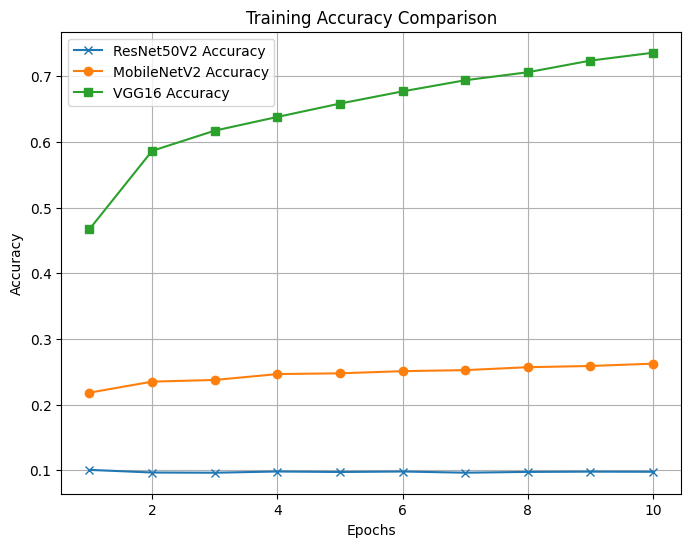

In [53]:
x = range(1, 11)
plt.figure(figsize=(8,6))
plt.plot(x,res_acc, label='ResNet50V2 Accuracy', marker='x')
plt.plot(x,mobilenet_acc, label='MobileNetV2 Accuracy', marker='o')
plt.plot(x,vgg16_acc, label='VGG16 Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend(loc='upper left')
plt.grid()
plt.title('Training Accuracy Comparison')